Code chuyển dữ liệu từ dạng .xlxs sang .csv

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file Excel
file_path = '/content/drive/MyDrive/DATA_KPDL/vietinbank.xlsx'
df = pd.read_excel(file_path)

# Chuyển dữ liệu sang định dạng CSV và lưu vào file mới
csv_file_path = '/content/drive/MyDrive/DATA_KPDL/vietinbank.csv'  # Đường dẫn và tên file CSV bạn muốn lưu
df.to_csv(csv_file_path, index=False)  # index=False để không ghi chỉ số dòng vào file CSV

print(f'File đã được chuyển sang CSV và lưu tại: {csv_file_path}')


File đã được chuyển sang CSV và lưu tại: /content/drive/MyDrive/DATA_KPDL/vietinbank.csv


Code gộp dữ liệu từ 3 ngân hàng thành 1 file

In [ ]:
import pandas as pd

# Đường dẫn đến các file CSV
file1 = '/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv'
file2 = '/content/drive/MyDrive/DATA_KPDL/bidv.csv'
file3 = '/content/drive/MyDrive/DATA_KPDL/vietinbank.csv'

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv(file1, header=0)  # Đọc file với dòng tiêu đề
df2 = pd.read_csv(file2, header=0)
df3 = pd.read_csv(file3, header=0)

# Kiểm tra tính đồng nhất của các cột
if not (df1.columns.equals(df2.columns) and df1.columns.equals(df3.columns)):
    raise ValueError("Tên cột không đồng nhất giữa các file. Vui lòng kiểm tra lại!")

# Gộp dữ liệu từ 3 file
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Kiểm tra nếu dòng tiêu đề bị lẫn vào dữ liệu
first_row = combined_df.iloc[0]
if all(first_row == combined_df.columns):
    # Nếu dòng đầu tiên trùng với tiêu đề, loại bỏ dòng đầu tiên
    combined_df = combined_df.iloc[1:]

# Xuất dữ liệu gộp thành file CSV mới
output_file = '/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv'
combined_df.to_csv(output_file, index=False)

print(f"Dữ liệu đã được gộp thành công và lưu tại {output_file}")


Dữ liệu đã được gộp thành công và lưu tại /content/drive/MyDrive/DATA_KPDL/merge_data_final.csv


In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = '/content/drive/MyDrive/DATA_KPDL/vietinbank.csv'
df = pd.read_csv(file_path)

# Xóa cột đầu tiên và cột cuối cùng
df = df.iloc[:, 1:-1]

# Lưu lại file CSV sau khi xóa cột
df.to_csv('/content/drive/MyDrive/DATA_KPDL/vietinbank.csv', index=False)  # Lưu vào file mới mà không có chỉ số dòng

print("Đã xóa cột đầu tiên và cuối cùng thành công!")


Đã xóa cột đầu tiên và cuối cùng thành công!


Code kiểm tra số cột của mỗi file csv



In [ ]:
import pandas as pd

# Đường dẫn tới file CSV
file_path = "/content/drive/MyDrive/DATA_KPDL/merged_file.csv"

# Đọc file CSV
df = pd.read_csv(file_path)

# In số lượng cột
print(f"File CSV có {df.shape[1]} cột.")


File CSV có 4 cột.


Code đổi tên cột của các file dữ liệu để đồng nhất

In [ ]:
import pandas as pd

# Đường dẫn tới file CSV
file_path = "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv"

# Đọc file CSV
df = pd.read_csv(file_path)

# Đổi tên cột
df.rename(
    columns={
        "date_time": "timestamp",
        "transaction_comment": "credit",
        "Nội dung chi tiết": "description",
        "Kết quả lọc tên": "full_name",
    },
    inplace=True,
)

# Lưu lại file CSV với cột đã đổi tên
output_file = "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv"
df.to_csv(output_file, index=False)

# Kiểm tra kết quả
print("Tên cột sau khi đổi:")
print(df.columns)




Tên cột sau khi đổi:
Index(['timestamp', 'credit', 'description', 'full_name'], dtype='object')


Code gộp dữ liệu của bidv, vietinbank vào vcb

In [ ]:
import pandas as pd

# Đường dẫn tới hai file CSV
file_with_header = "/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv"  # File có tiêu đề
file_without_header = "/content/drive/MyDrive/DATA_KPDL/final_csv.csv"  # File không có tiêu đề

# Đọc file có tiêu đề
df_with_header = pd.read_csv(file_with_header)

# Đọc file không có tiêu đề và thêm tiêu đề từ file có tiêu đề
df_without_header = pd.read_csv(file_without_header, header=None)
df_without_header.columns = df_with_header.columns  # Đặt tên cột giống file có tiêu đề

# Gộp hai DataFrame
merged_df = pd.concat([df_with_header, df_without_header], ignore_index=True)

# Lưu kết quả vào file mới
output_file = "/content/drive/MyDrive/DATA_KPDL/merged_file.csv"
merged_df.to_csv(output_file, index=False)

print(f"Đã gộp file vào: {output_file}")


Đã gộp file vào: /content/drive/MyDrive/DATA_KPDL/merged_file.csv


In [ ]:
pip install matplotlib seaborn


In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = "/content/drive/MyDrive/DATA_KPDL/merged_file.csv"
df = pd.read_csv(file_path)

# Tính toán bộ 5 tóm tắt cho cột 'credit' (hoặc cột khác)
five_number_summary = df['credit'].describe()

print(five_number_summary)



count    2.076224e+06
mean     8.242182e+05
std      4.002201e+07
min      0.000000e+00
25%      1.000000e+05
50%      2.000000e+05
75%      5.000000e+05
max      4.000000e+10
Name: credit, dtype: float64


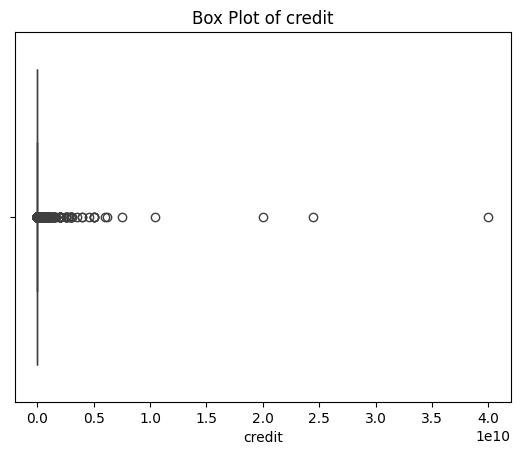

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới file CSV
file_path = "/content/drive/MyDrive/DATA_KPDL/merged_file.csv"

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path)

# Tạo box plot cho các cột dữ liệu (ví dụ: 'Số tiền')
sns.boxplot(data=df, x='credit')  # Bạn có thể thay 'credit' bằng cột dữ liệu mà bạn muốn vẽ box plot

# Hiển thị biểu đồ
plt.title('Box Plot of credit')
plt.show()


In [ ]:
import pandas as pd

# Đường dẫn tới file CSV
file_path = '/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv'  # Thay bằng đường dẫn thực tế

# Đọc file CSV
df = pd.read_csv(file_path)

# Đếm số dòng dữ liệu
num_rows = len(df)

print(f"Số dòng dữ liệu trong file CSV: {num_rows}")


Số dòng dữ liệu trong file CSV: 2076245


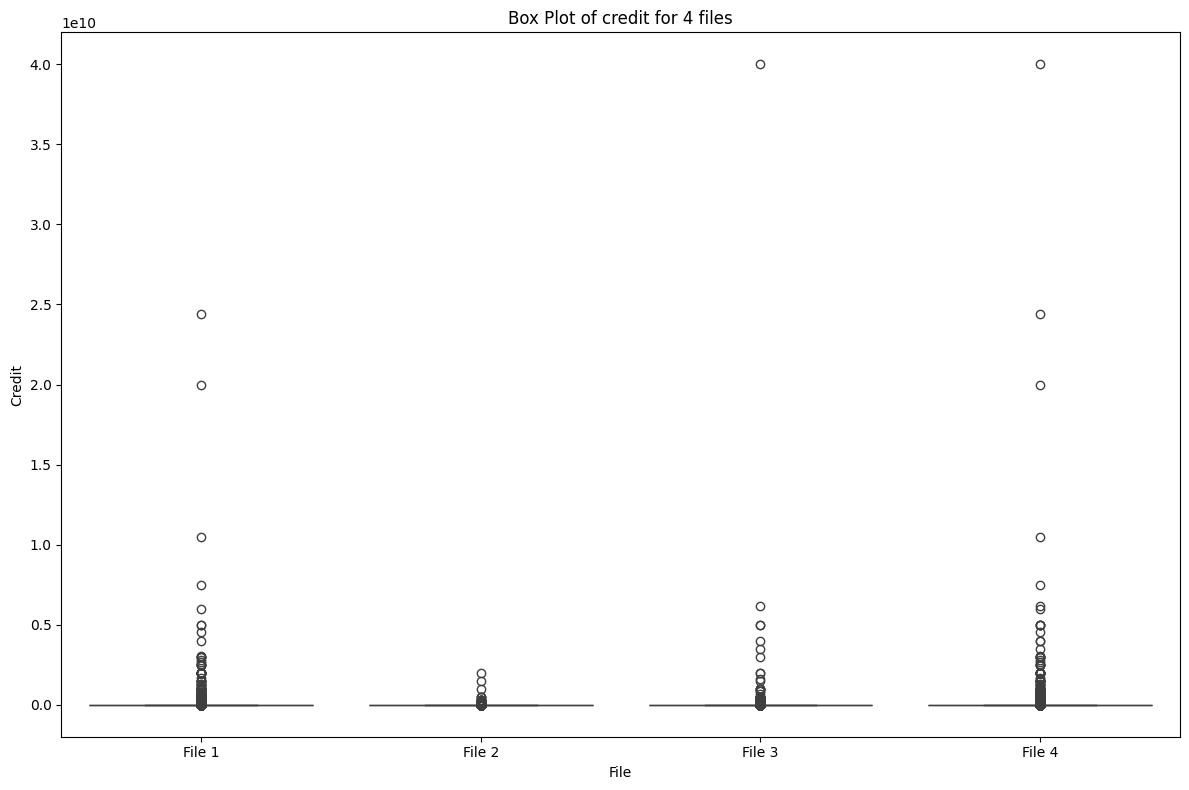

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới các file CSV
file_paths = [
    "/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv",
    "/content/drive/MyDrive/DATA_KPDL/bidv.csv",
    "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv",
    "/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv"
]

# Khởi tạo một list để lưu DataFrame
dfs = []

# Đọc dữ liệu từ các file và thêm tên file vào mỗi DataFrame
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['file'] = f'File {i+1}'  # Thêm cột 'file' để phân biệt
    dfs.append(df)

# Ghép tất cả các DataFrame lại với nhau
df_combined = pd.concat(dfs, ignore_index=True)

# Tạo một hình ảnh có kích thước lớn hơn cho biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ boxplot cho các file dữ liệu (credit) trên cùng một biểu đồ
sns.boxplot(data=df_combined, x='file', y='credit')

# Thêm tiêu đề và nhãn cho trục
plt.title('Box Plot of credit for 4 files')
plt.xlabel('File')
plt.ylabel('Credit')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để các biểu đồ không bị chồng lên nhau
plt.show()


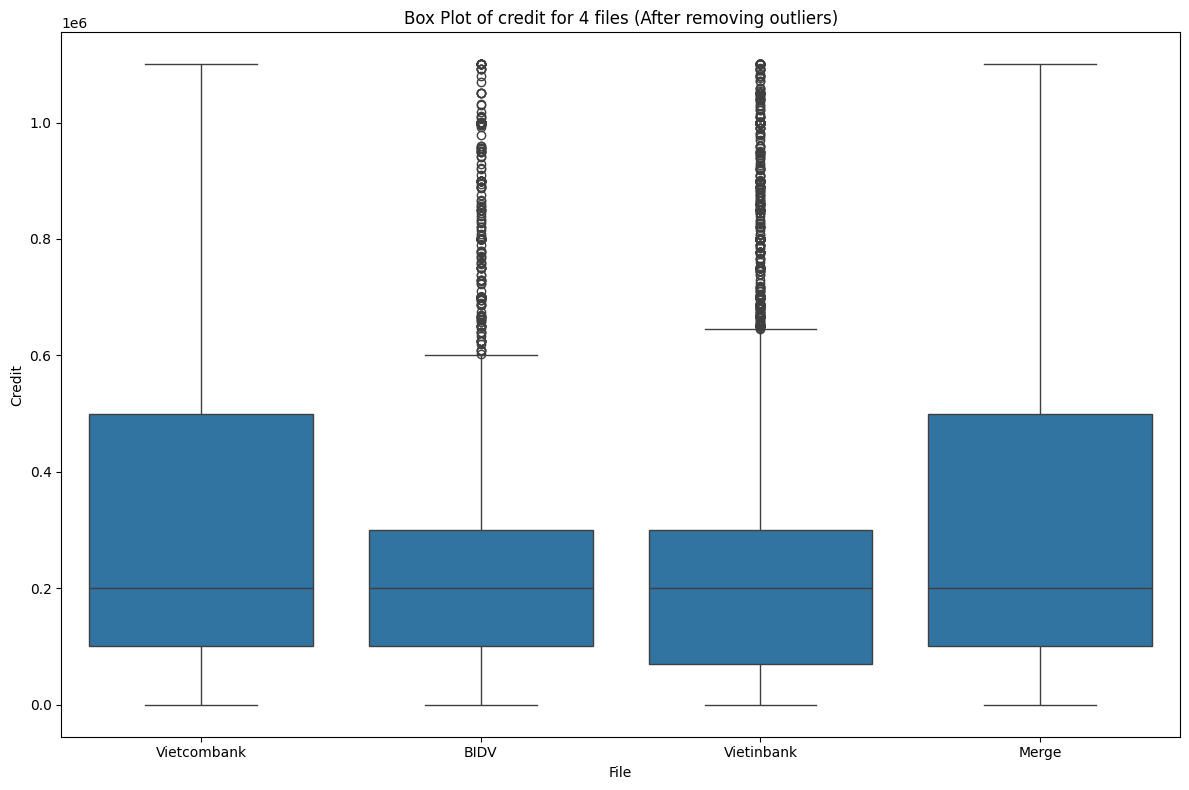

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới các file CSV
file_paths = [
    "/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv",
    "/content/drive/MyDrive/DATA_KPDL/bidv.csv",
    "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv",
    "/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv"
]

# Tên các file tương ứng
file_names = ['Vietcombank', 'BIDV', 'Vietinbank', 'Merge']

# Khởi tạo một list để lưu DataFrame
dfs = []

# Đọc dữ liệu từ các file và thêm tên file vào mỗi DataFrame
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['file'] = file_names[i]  # Thêm tên file vào cột 'file'

    # Tính toán các giá trị Q1, Q2, Q3, IQR, lower_bound và upper_bound
    Q1 = df['credit'].quantile(0.25)
    Q3 = df['credit'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loại bỏ các giá trị ngoại lai
    df_filtered = df[(df['credit'] >= lower_bound) & (df['credit'] <= upper_bound)]

    dfs.append(df_filtered)  # Thêm dữ liệu đã loại bỏ ngoại lai vào danh sách

# Ghép tất cả các DataFrame đã loại bỏ ngoại lai lại với nhau
df_combined_filtered = pd.concat(dfs, ignore_index=True)

# Tạo một hình ảnh có kích thước lớn hơn cho biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ boxplot cho các file dữ liệu đã loại bỏ ngoại lai trên cùng một biểu đồ
sns.boxplot(data=df_combined_filtered, x='file', y='credit')

# Thêm tiêu đề và nhãn cho trục
plt.title('Box Plot of credit for 4 files (After removing outliers)')
plt.xlabel('File')
plt.ylabel('Credit')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để các biểu đồ không bị chồng lên nhau
plt.show()


Vẽ biểu đồ boxplot trước và sau xử lý giá trị ngoại lai

<ipython-input-4-21314e9feecf>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='file', y='credit', palette=colors)
<ipython-input-4-21314e9feecf>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_filtered, x='file', y='credit', palette=colors)


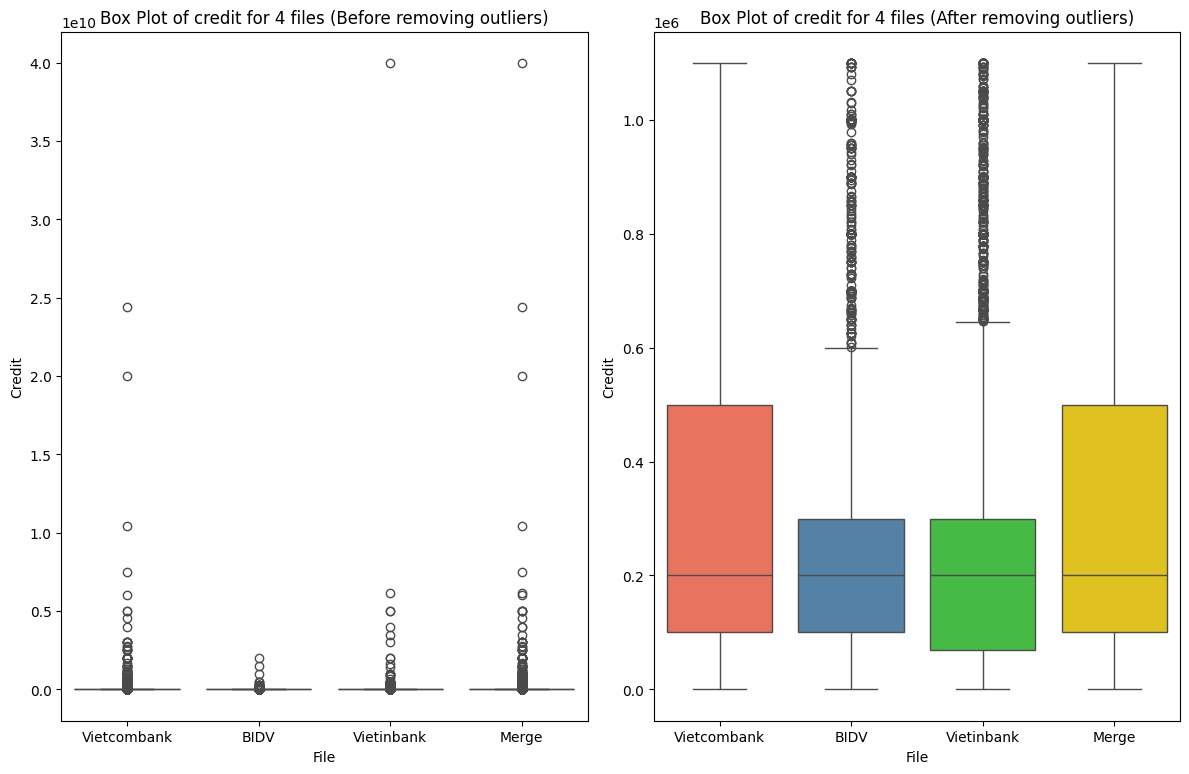

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới các file CSV
file_paths = [
    "/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv",
    "/content/drive/MyDrive/DATA_KPDL/bidv.csv",
    "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv",
    "/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv"
]

# Tên các file tương ứng
file_names = ['Vietcombank', 'BIDV', 'Vietinbank', 'Merge']

# Các màu sắc tùy chỉnh cho mỗi boxplot
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Màu đỏ, xanh dương, xanh lá, vàng

# Khởi tạo một list để lưu DataFrame
dfs = []
dfs_filtered = []  # Danh sách để lưu các DataFrame đã lọc ngoại lai

# Đọc dữ liệu từ các file và thêm tên file vào mỗi DataFrame
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['file'] = file_names[i]  # Thêm tên file vào cột 'file'

    # Tính toán các giá trị Q1, Q2, Q3, IQR, lower_bound và upper_bound
    Q1 = df['credit'].quantile(0.25)
    Q3 = df['credit'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loại bỏ các giá trị ngoại lai
    df_filtered = df[(df['credit'] >= lower_bound) & (df['credit'] <= upper_bound)]

    dfs.append(df)  # Thêm dữ liệu gốc vào danh sách
    dfs_filtered.append(df_filtered)  # Thêm dữ liệu đã loại bỏ ngoại lai vào danh sách

# Ghép tất cả các DataFrame gốc lại với nhau
df_combined = pd.concat(dfs, ignore_index=True)

# Ghép tất cả các DataFrame đã loại bỏ ngoại lai lại với nhau
df_combined_filtered = pd.concat(dfs_filtered, ignore_index=True)

# Tạo một hình ảnh có kích thước lớn hơn cho biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ boxplot cho các file dữ liệu gốc trên cùng một biểu đồ
plt.subplot(1, 2, 1)  # Biểu đồ đầu tiên (1 dòng, 2 cột, biểu đồ đầu tiên)
sns.boxplot(data=df_combined, x='file', y='credit', palette=colors)
plt.title('Box Plot of credit for 4 files (Before removing outliers)')
plt.xlabel('File')
plt.ylabel('Credit')

# Vẽ boxplot cho các file dữ liệu đã loại bỏ ngoại lai trên cùng một biểu đồ
plt.subplot(1, 2, 2)  # Biểu đồ thứ hai
sns.boxplot(data=df_combined_filtered, x='file', y='credit', palette=colors)
plt.title('Box Plot of credit for 4 files (After removing outliers)')
plt.xlabel('File')
plt.ylabel('Credit')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để các biểu đồ không bị chồng lên nhau
plt.show()


Biểu đồ trước và sau khi xử lý giá trị ngoại lai
In ra các giá trị mean, mode, median trên tập dữ liệu khi đã loại bỏ ngoại lai

File: Vietcombank
Mean: 284927.43096128124
Median: 200000.0
Mode: 100000.0
--------------------------------------------------
File: BIDV
Mean: 259088.33435184983
Median: 200000.0
Mode: 100000
--------------------------------------------------
File: Vietinbank
Mean: 251225.61167387734
Median: 200000.0
Mode: 100000.0
--------------------------------------------------
File: Merge
Mean: 280646.29956630256
Median: 200000.0
Mode: 100000.0
--------------------------------------------------


<ipython-input-6-8777aaad2aef>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='file', y='credit', palette=colors)
<ipython-input-6-8777aaad2aef>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_filtered, x='file', y='credit', palette=colors)


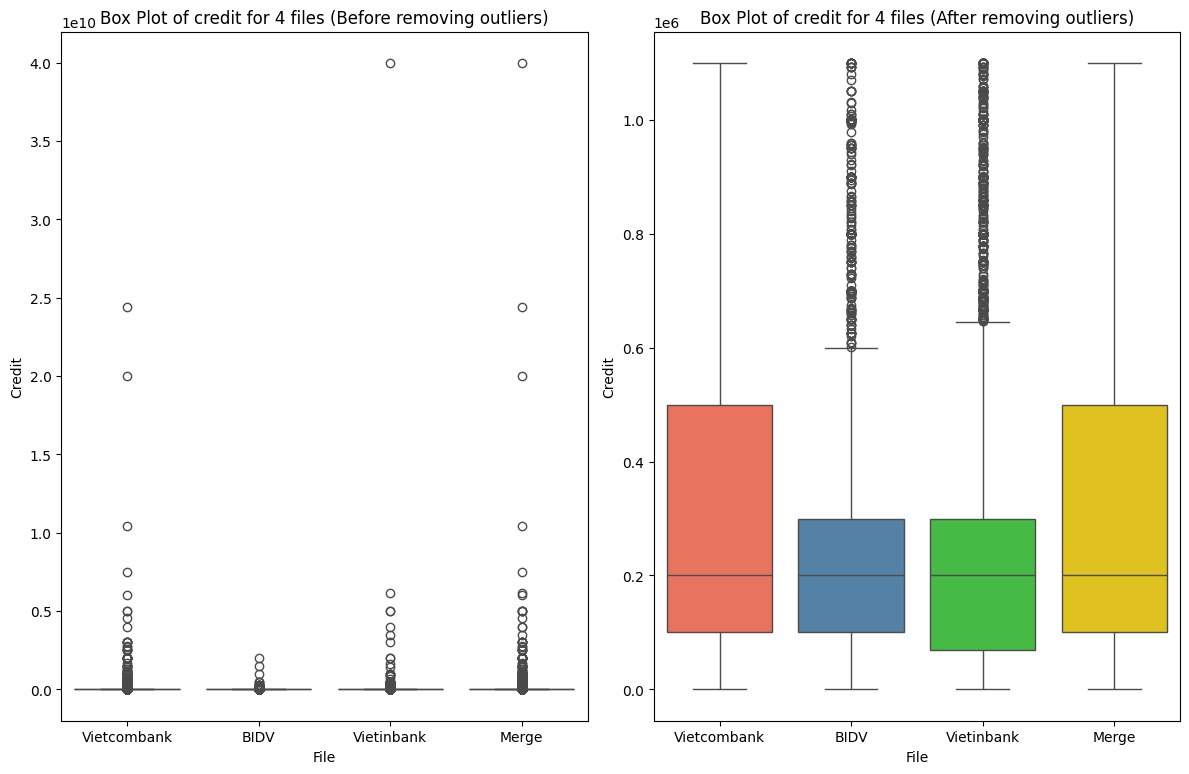

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới các file CSV
file_paths = [
    "/content/drive/MyDrive/DATA_KPDL/vcb_1-30.csv",
    "/content/drive/MyDrive/DATA_KPDL/bidv.csv",
    "/content/drive/MyDrive/DATA_KPDL/vietinbank.csv",
    "/content/drive/MyDrive/DATA_KPDL/merge_data_final.csv"
]

# Tên các file tương ứng
file_names = ['Vietcombank', 'BIDV', 'Vietinbank', 'Merge']

# Các màu sắc tùy chỉnh cho mỗi boxplot
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Màu đỏ, xanh dương, xanh lá, vàng

# Khởi tạo một list để lưu DataFrame
dfs = []
dfs_filtered = []  # Danh sách để lưu các DataFrame đã lọc ngoại lai

# Đọc dữ liệu từ các file và thêm tên file vào mỗi DataFrame
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['file'] = file_names[i]  # Thêm tên file vào cột 'file'

    # Tính toán các giá trị Q1, Q2, Q3, IQR, lower_bound và upper_bound
    Q1 = df['credit'].quantile(0.25)
    Q3 = df['credit'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loại bỏ các giá trị ngoại lai
    df_filtered = df[(df['credit'] >= lower_bound) & (df['credit'] <= upper_bound)]

    # Tính toán các giá trị thống kê cho dữ liệu đã loại bỏ ngoại lai
    mean_value = df_filtered['credit'].mean()
    median_value = df_filtered['credit'].median()
    mode_value = df_filtered['credit'].mode()[0]  # Lấy mode đầu tiên nếu có nhiều mode

    # In ra các giá trị thống kê
    print(f"File: {file_names[i]}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    print("-" * 50)

    dfs.append(df)  # Thêm dữ liệu gốc vào danh sách
    dfs_filtered.append(df_filtered)  # Thêm dữ liệu đã loại bỏ ngoại lai vào danh sách

# Ghép tất cả các DataFrame gốc lại với nhau
df_combined = pd.concat(dfs, ignore_index=True)

# Ghép tất cả các DataFrame đã loại bỏ ngoại lai lại với nhau
df_combined_filtered = pd.concat(dfs_filtered, ignore_index=True)

# Tạo một hình ảnh có kích thước lớn hơn cho biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ boxplot cho các file dữ liệu gốc trên cùng một biểu đồ
plt.subplot(1, 2, 1)  # Biểu đồ đầu tiên (1 dòng, 2 cột, biểu đồ đầu tiên)
sns.boxplot(data=df_combined, x='file', y='credit', palette=colors)
plt.title('Box Plot of credit for 4 files (Before removing outliers)')
plt.xlabel('File')
plt.ylabel('Credit')

# Vẽ boxplot cho các file dữ liệu đã loại bỏ ngoại lai trên cùng một biểu đồ
plt.subplot(1, 2, 2)  # Biểu đồ thứ hai
sns.boxplot(data=df_combined_filtered, x='file', y='credit', palette=colors)
plt.title('Box Plot of credit for 4 files (After removing outliers)')
plt.xlabel('File')
plt.ylabel('Credit')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để các biểu đồ không bị chồng lên nhau
plt.show()


In [1]:
!git clone https://github.com/TVAexe/KPDL-24-25.git
%cd TVAexe/KPDL-24-25  # Di chuyển vào thư mục repo


Cloning into 'KPDL-24-25'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 18 (delta 4), reused 13 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.12 MiB | 7.20 MiB/s, done.
Resolving deltas: 100% (4/4), done.
[Errno 2] No such file or directory: 'TVAexe/KPDL-24-25 # Di chuyển vào thư mục repo'
/content


In [ ]:
!cp /content/your_file.ipynb /content/YOUR_REPO/
